<a href="https://colab.research.google.com/github/NidhiChaurasia/LGMVIP-DataScience/blob/main/Fashion_Accessories_prediction_model_using_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Networks for Machine Learning & CNN | Fake Images with ML

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


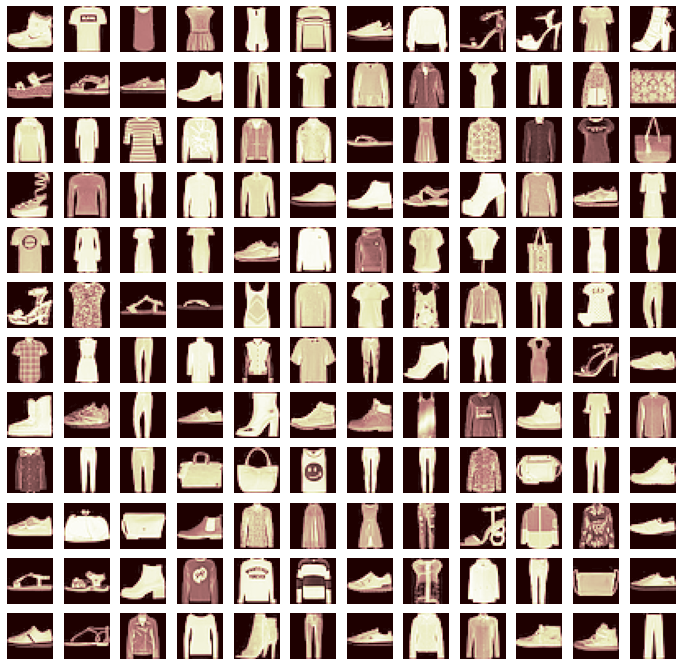

In [5]:
plt.figure(figsize = (12,12))
for i in range(144):
  plt.subplot(12,12,i+1)
  plt.axis('off')
  plt.imshow(x_train[i],cmap='pink')

There are 6000 images per sample as shown in the below bar chart:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


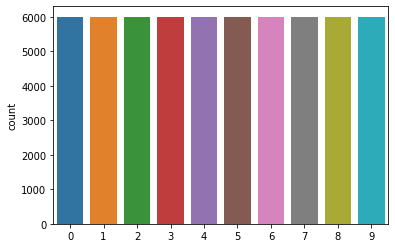

In [6]:
sns.countplot(y_train)

In [7]:
x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])

In [8]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range  = 0.1,
)
train_datagen.fit(x_train)

In [11]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen.fit(x_test)

Building a Convolutional Neural Network : The Architecture

In [14]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64 , (3,3),padding = 'same',activation = 'relu',input_shape =(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64 , (3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128 , (3,3),activation = 'relu'), #128 no. of filters in third convolution
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    tf.keras.layers.Dense(10,activation= 'softmax')
])
                                    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Training the model

In [16]:
history = model.fit(
train_datagen.flow(x_train,y_train,batch_size=64),
validation_data = val_datagen.flow(x_test,y_test),
batch_size = 64,
epochs = 20,
verbose = 1,
)

Epoch 1/20
938/938 [==============================] - 57s 30ms/step - loss: 0.6424 - accuracy: 0.7590 - val_loss: 0.4573 - val_accuracy: 0.8330
Epoch 2/20
938/938 [==============================] - 28s 30ms/step - loss: 0.4368 - accuracy: 0.8353 - val_loss: 0.3754 - val_accuracy: 0.8566
Epoch 3/20
938/938 [==============================] - 29s 31ms/step - loss: 0.3765 - accuracy: 0.8582 - val_loss: 0.3382 - val_accuracy: 0.8762
Epoch 4/20
938/938 [==============================] - 29s 31ms/step - loss: 0.3450 - accuracy: 0.8702 - val_loss: 0.3084 - val_accuracy: 0.8864
Epoch 5/20
938/938 [==============================] - 28s 30ms/step - loss: 0.3251 - accuracy: 0.8791 - val_loss: 0.2951 - val_accuracy: 0.8879
Epoch 6/20
938/938 [==============================] - 28s 30ms/step - loss: 0.3101 - accuracy: 0.8847 - val_loss: 0.3108 - val_accuracy: 0.8874
Epoch 7/20
938/938 [==============================] - 28s 30ms/step - loss: 0.2970 - accuracy: 0.8883 - val_loss: 0.2717 - val_accuracy:

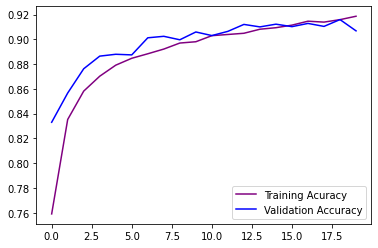

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()

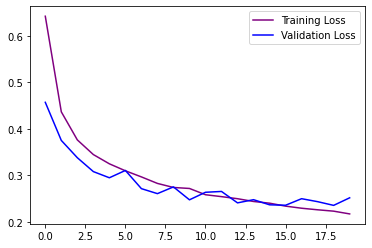

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'purple',label = 'Training Loss')
plt.plot(val_loss,color = 'blue',label = 'Validation Loss')
plt.legend()